In [2]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

from sklearn import model_selection

from sklearn.metrics import confusion_matrix

%matplotlib inline 

In [3]:
# all accepted loans from lendingclub
all_accept_df = pd.read_csv('./archive/accepted_2007_to_2018q4.csv')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# convert columns to numeric

all_accept_df['term'] = pd.to_numeric(all_accept_df['term'].apply(lambda x: re.findall(r'\d+', str(x))).str[0])

# convert columns to date

all_accept_df['issue_d'] = pd.to_datetime(all_accept_df['issue_d'])
all_accept_df['last_pymnt_d'] = pd.to_datetime(all_accept_df['last_pymnt_d'])

In [5]:
def AddMonthsToDate(dates, months):
    updatedDates = []
    
    for i in range(0, len(dates)):
        toAddMnths = pd.to_numeric(months.iat[i]) - 3
        updatedDates.append(dates.iat[i] + pd.DateOffset(months=toAddMnths))
        
    return updatedDates

In [6]:
all_paid_df = all_accept_df[(all_accept_df['loan_status'] == 'Fully Paid') | (all_accept_df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid')]

print(len(all_paid_df['issue_d']))

updatedDates = AddMonthsToDate(all_paid_df['issue_d'], all_paid_df['term'])

print(len(updatedDates))

all_paid_df['loan_prepaid'] = all_paid_df['last_pymnt_d'] < updatedDates
all_paid_df['loan_prepaid'] = ['Prepaid' if x==1 else 'Fully Paid' for x in all_paid_df['loan_prepaid']]

1078739
1078739


/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
all_paid_df['loan_prepaid'].value_counts()

Prepaid       805910
Fully Paid    272829
Name: loan_prepaid, dtype: int64

[Text(0, 0.5, 'Loan Amount'), Text(0.5, 0, 'Loan Prepayment')]

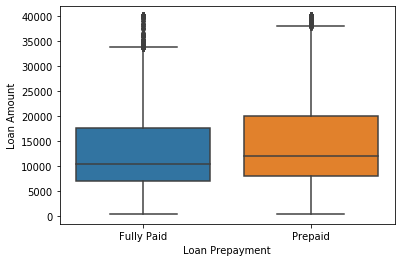

In [64]:
df = all_paid_df[['loan_prepaid', 'loan_amnt']]

ax = sns.boxplot(x="loan_prepaid", y="loan_amnt", data=df)
ax.set(xlabel='Loan Prepayment', ylabel='Loan Amount')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Prepaid loans')

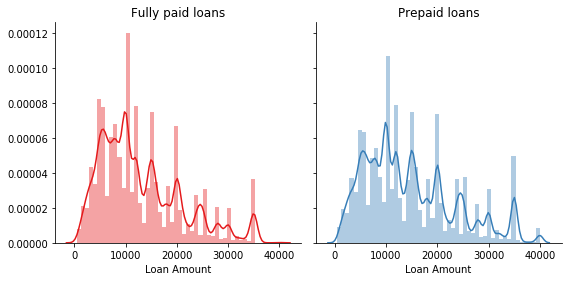

In [65]:
fcGrid = sns.FacetGrid(df, col='loan_prepaid', hue="loan_prepaid", palette="Set1", size=4)
ax = fcGrid.map(sns.distplot, "loan_amnt")
ax.set_xlabels('Loan Amount')
axes = fcGrid.axes.flatten()
axes[0].set_title("Fully paid loans")
axes[1].set_title("Prepaid loans")

[Text(0, 0.5, 'Interest Rate'), Text(0.5, 0, 'Loan Prepayment')]

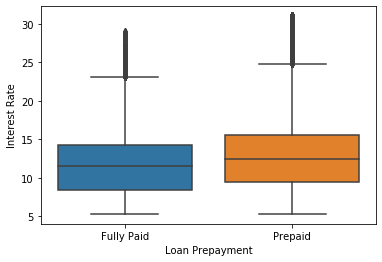

In [66]:
df = all_paid_df[['loan_prepaid', 'int_rate']]

ax = sns.boxplot(x="loan_prepaid", y="int_rate", data=df)
ax.set(xlabel='Loan Prepayment', ylabel='Interest Rate')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Prepaid loans')

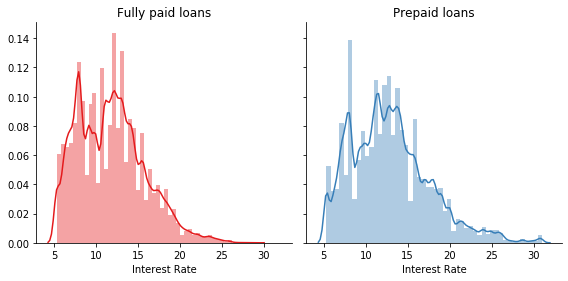

In [67]:
fcGrid = sns.FacetGrid(df, col='loan_prepaid', hue="loan_prepaid", palette="Set1", size=4)
ax = fcGrid.map(sns.distplot, "int_rate")
ax.set_xlabels('Interest Rate')
axes = fcGrid.axes.flatten()
axes[0].set_title("Fully paid loans")
axes[1].set_title("Prepaid loans")

[Text(0, 0.5, 'Avg FICO range'), Text(0.5, 0, 'Loan Prepayment')]

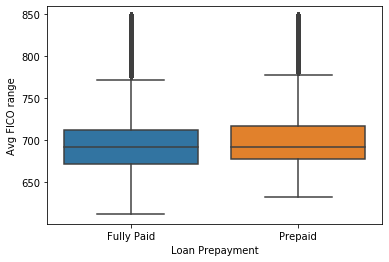

In [68]:
# Box plot good vs bad loans based on Avg FICO range

avg_fico = (all_paid_df['fico_range_low'] + all_paid_df['fico_range_high']) / 2

df = pd.DataFrame({ 'loan_prepaid': all_paid_df['loan_prepaid'], 'avg_fico': avg_fico })

ax = sns.boxplot(x="loan_prepaid", y="avg_fico", data=df)
ax.set(xlabel='Loan Prepayment', ylabel='Avg FICO range')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Prepaid loans')

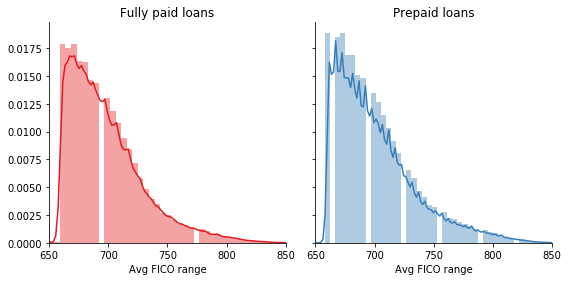

In [69]:
fcGrid = sns.FacetGrid(df, col='loan_prepaid', hue="loan_prepaid", palette="Set1", size=4, xlim=(650, 850))
ax = fcGrid.map(sns.distplot, "avg_fico")
ax.set_xlabels('Avg FICO range')
axes = fcGrid.axes.flatten()
axes[0].set_title("Fully paid loans")
axes[1].set_title("Prepaid loans")

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


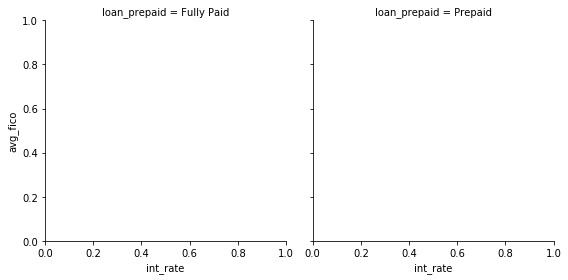

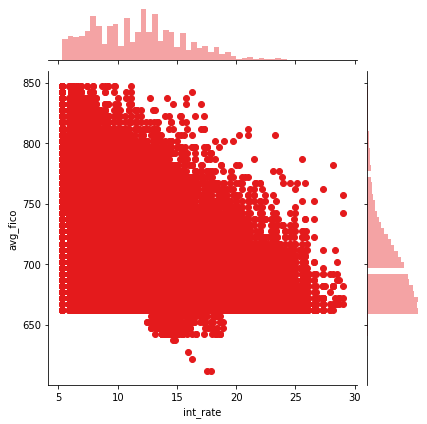

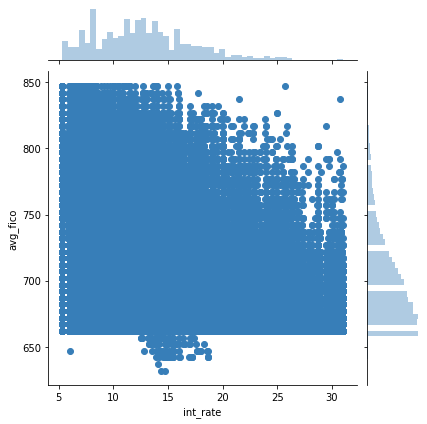

In [70]:
df = pd.DataFrame({ 'loan_prepaid': all_paid_df['loan_prepaid'], 'avg_fico': avg_fico, 'int_rate':all_paid_df['int_rate']})
fcGrid = sns.FacetGrid(df, col='loan_prepaid', hue="loan_prepaid", palette="Set1", size=4)
fcGrid.map(sns.jointplot, 'int_rate', 'avg_fico')

[Text(0, 0.5, 'Total current balance of all accounts'),
 Text(0.5, 0, 'Loan Prepayment')]

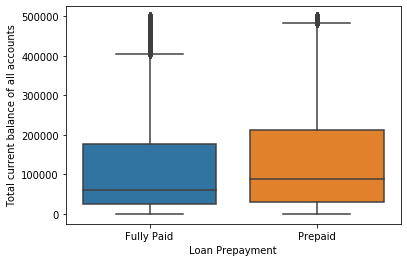

In [71]:
# Box plot good vs bad loans based on tot_cur_bal

df = all_paid_df[['loan_prepaid', 'tot_cur_bal']]
df = df[df['tot_cur_bal'] < 500000]

ax = sns.boxplot(x="loan_prepaid", y="tot_cur_bal", data=df)
ax.set(xlabel='Loan Prepayment', ylabel='Total current balance of all accounts')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Prepaid loans')

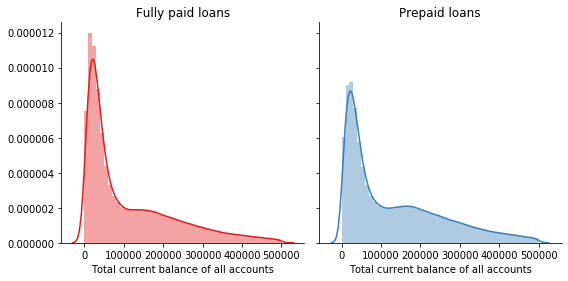

In [72]:
fcGrid = sns.FacetGrid(df, col='loan_prepaid', hue="loan_prepaid", palette="Set1", size=4)
ax = fcGrid.map(sns.distplot, "tot_cur_bal")
ax.set_xlabels('Total current balance of all accounts')
axes = fcGrid.axes.flatten()
axes[0].set_title("Fully paid loans")
axes[1].set_title("Prepaid loans")

[Text(0, 0.5, 'Debt to Income ratio'), Text(0.5, 0, 'Loan Prepayment')]

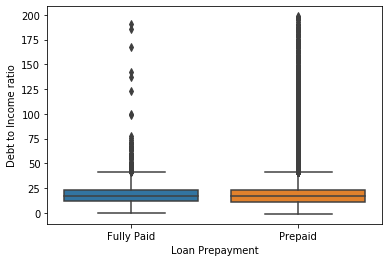

In [73]:
df = all_paid_df[['loan_prepaid', 'dti']]
df = df[df['dti'] < 200]

ax = sns.boxplot(x="loan_prepaid", y="dti", data=df)
ax.set(xlabel='Loan Prepayment', ylabel='Debt to Income ratio')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Prepaid loans')

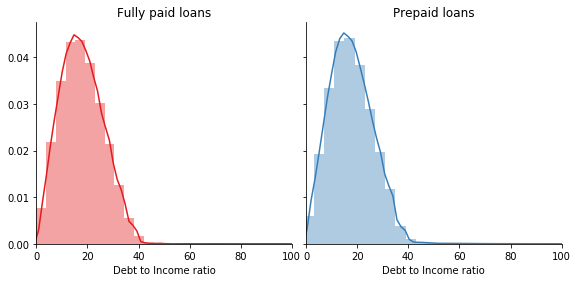

In [74]:
# Box plot good vs bad loans based on dti

df = all_paid_df[['loan_prepaid', 'dti']]
df = df[df['dti'] < 200]
fcGrid = sns.FacetGrid(df, col='loan_prepaid', hue="loan_prepaid", palette="Set1", size=4)
ax = fcGrid.map(sns.distplot, "dti")
ax.set(xlim=(0, 100))
ax.set_xlabels('Debt to Income ratio')
axes = fcGrid.axes.flatten()
axes[0].set_title("Fully paid loans")
axes[1].set_title("Prepaid loans")

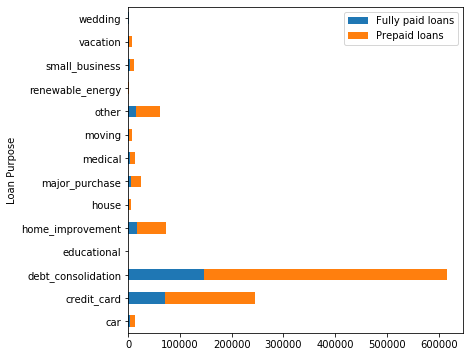

In [8]:
df = all_paid_df\
            .groupby('purpose').agg({'loan_prepaid':'value_counts'})\
            .unstack()\
            .plot\
            .barh(stacked=True, figsize=(6, 6))

df.set_ylabel('Loan Purpose')
df.legend(["Fully paid loans", "Prepaid loans"])

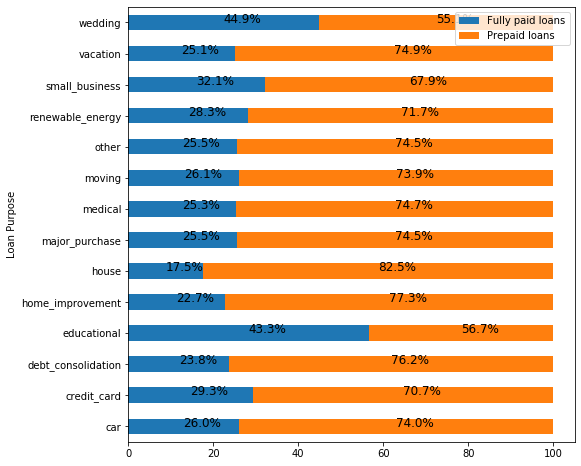

In [9]:
df = all_paid_df.groupby('purpose').agg({'loan_prepaid':'value_counts'})
df = df.groupby(level=[0]).apply(lambda x: 100 * x / float(x.sum()))

ax = df.unstack().plot.barh(stacked=True, figsize=(8, 8))
ax.set_ylabel('Loan Purpose')
ax.legend(["Fully paid loans", "Prepaid loans"])

values = df.values.round(1)

for i,rec in enumerate(ax.patches):    
    if i < 14:
        index = i*2 + 1
    else:
        index = (i - 14) * 2
    ax.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
            '{0}%'.format(values[index][0]), fontsize=12, color='black')

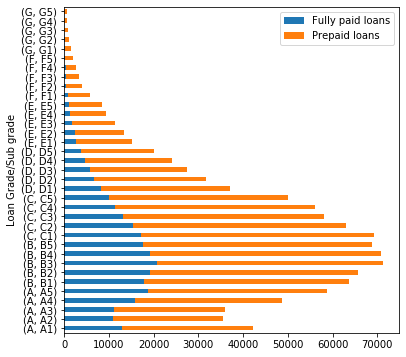

In [10]:
df = all_paid_df.groupby(['grade', 'sub_grade']).agg({'loan_prepaid':'value_counts'})
df = df.groupby(level=[0, 1]).apply(lambda x: 100 * x / float(x.sum()))
#df.values
df.head()

df = all_paid_df\
            .groupby(['grade', 'sub_grade']).agg({'loan_prepaid':'value_counts'})\
            .unstack()\
            .plot\
            .barh(stacked=True, figsize=(6, 6))

df.set_ylabel('Loan Grade/Sub grade')
df.legend(["Fully paid loans", "Prepaid loans"])

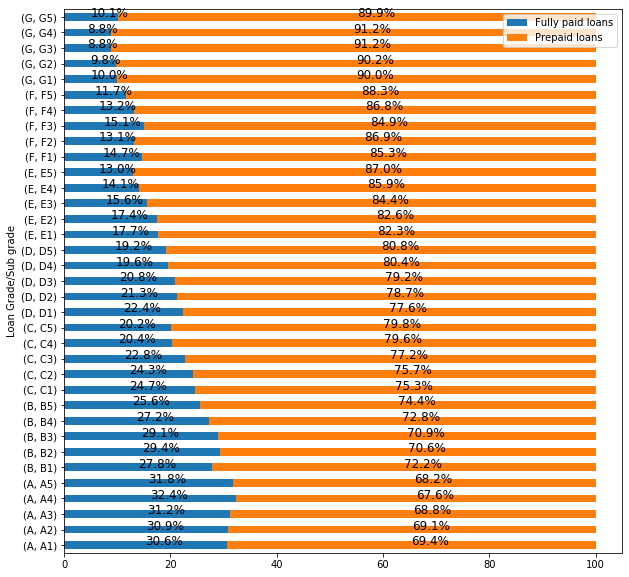

In [11]:
df = all_paid_df.groupby(['grade', 'sub_grade']).agg({'loan_prepaid':'value_counts'})
df = df.groupby(level=[1, 0]).apply(lambda x: 100 * x / float(x.sum()))

ax = df.unstack().plot.barh(stacked=True, figsize=(10, 10))
ax.set_ylabel('Loan Grade/Sub grade')
ax.legend(["Fully paid loans", "Prepaid loans"])

values = df.values.round(1)

for i,rec in enumerate(ax.patches):
    if i < 35:
        index = i*2 + 1
    else:
        index = (i - 35) * 2
    ax.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height()/2,
            '{0}%'.format(values[index][0]), fontsize=12, color='black')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Loan Payment - Fully Paid')

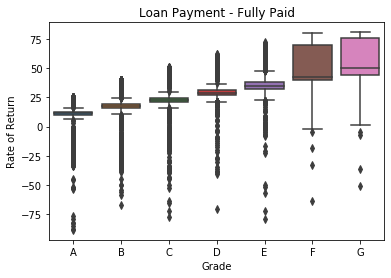

In [79]:
all_paid_df['Rate_of_Return'] = ((all_paid_df['total_rec_prncp'] + all_paid_df['total_rec_int'] - all_paid_df['loan_amnt']) / all_paid_df['loan_amnt']) * 100

df = all_paid_df[['grade', 'Rate_of_Return', 'loan_prepaid']]
df = df[df['loan_prepaid'] == 'Fully Paid']
df = df.sort_values(by=['grade'])
df = df.drop(['loan_prepaid'], axis=1)
df.dropna(inplace=True)

ax = sns.boxplot(x="grade", y="Rate_of_Return", data=df)
ax.set_ylabel('Rate of Return')
ax.set_xlabel('Grade')
ax.set_title('Loan Payment - Fully Paid')

/Users/kmanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Loan Payment - Prepaid')

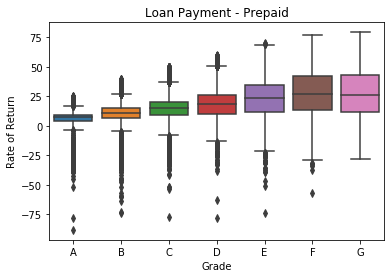

In [80]:
all_paid_df['Rate_of_Return'] = ((all_paid_df['total_rec_prncp'] + all_paid_df['total_rec_int'] - all_paid_df['loan_amnt']) / all_paid_df['loan_amnt']) * 100

df = all_paid_df[['grade', 'Rate_of_Return', 'loan_prepaid']]
df = df[df['loan_prepaid'] == 'Prepaid']
df = df.sort_values(by=['grade'])
df = df.drop(['loan_prepaid'], axis=1)
df.dropna(inplace=True)

ax = sns.boxplot(x="grade", y="Rate_of_Return", data=df)
ax.set_ylabel('Rate of Return')
ax.set_xlabel('Grade')
ax.set_title('Loan Payment - Prepaid')